# LAB | Ensemble Methods

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [3]:
#your code here

spaceship = spaceship.dropna().reset_index(drop=True)

In [4]:
spaceship["Cabin"] = spaceship["Cabin"].str[0]

spaceship["Cabin"] 

0       B
1       F
2       A
3       A
4       F
       ..
6601    A
6602    G
6603    G
6604    E
6605    E
Name: Cabin, Length: 6606, dtype: object

In [5]:
spaceship = spaceship.drop(columns=["Name", "PassengerId"])

In [8]:
for col in spaceship.select_dtypes(include=['object']).columns:
    spaceship = pd.get_dummies(spaceship, columns=[col])

In [10]:
spaceship = spaceship.astype('int64')
spaceship

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,39,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,24,0,109,9,25,549,44,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,58,1,43,3576,0,6715,49,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,33,0,0,1283,371,3329,193,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,16,0,303,70,151,565,2,1,1,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6601,41,1,0,6819,0,1643,74,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6602,18,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
6603,26,0,0,0,1872,1,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
6604,32,0,0,1049,0,353,3235,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [11]:
# Correlation Matrix

corr_matrix = spaceship.corr()

In [12]:
corr_matrix_transported = corr_matrix[['Transported']]

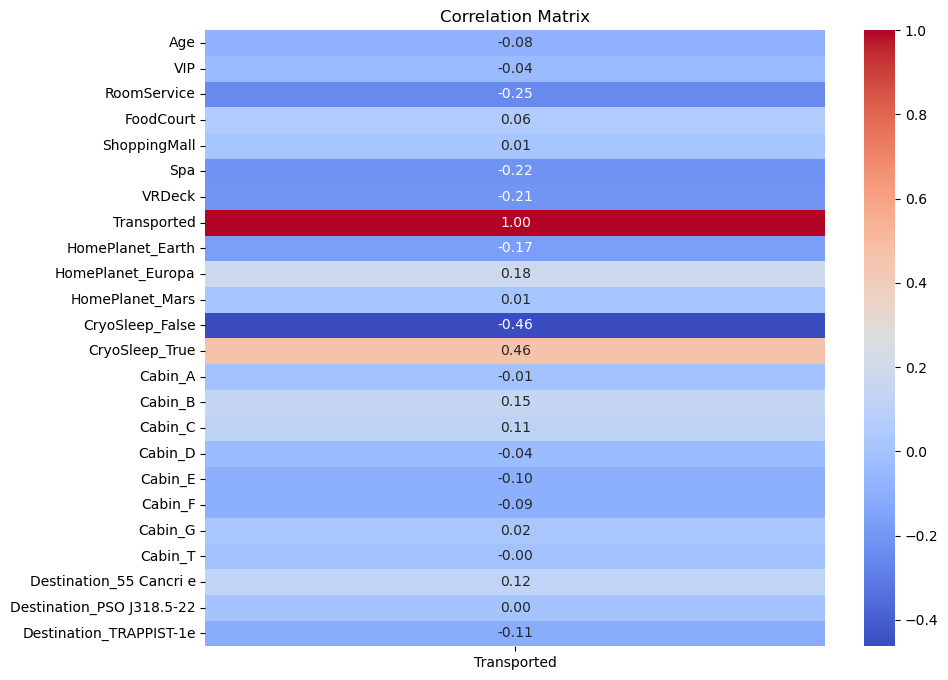

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_transported, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Perform Train Test Split**

In [20]:
#your code here

features = spaceship.drop(columns=['Transported'])
target = spaceship["Transported"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [22]:
normalizer = MinMaxScaler()

In [23]:
normalizer.fit(X_train)

MinMaxScaler()

In [24]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [25]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.632911,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.227848,0.0,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.189873,0.0,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.658228,0.0,0.0,0.000000,0.0,0.00000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.784810,1.0,0.0,0.054775,0.0,0.07774,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Model Selection** - now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

In [27]:
# Bagging

bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [28]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [29]:
pred = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 0.2776618380405198
RMSE 0.37804316010594147
R2 score 0.4283334763884541


In [31]:
# Pasting

pasting_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000, bootstrap=False)

In [32]:
pasting_reg.fit(X_train_norm, y_train)

BaggingRegressor(bootstrap=False, estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [34]:
pred = pasting_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", pasting_reg.score(X_test_norm, y_test))

MAE 0.27787288483883615
RMSE 0.378399091475192
R2 score 0.42725651028299705


- Random Forests

In [35]:
#your code here

forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [36]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [37]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 0.2675651352582032
RMSE 0.38204840851313526
R2 score 0.416156054210322


In [38]:
df_compare = pd.DataFrame(y_test.values, columns=["True"])
df_compare["pred"] = pred
df_compare

,True,pred
0,1,1.000000
1,0,0.804314
2,1,0.883005
3,0,0.818643
4,1,0.320000
...,...,...
1317,0,0.636661
1318,1,0.870000
1319,1,1.000000
1320,1,0.697478


- Gradient Boosting

In [39]:
#your code here

gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [40]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [41]:
pred = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 0.25981184472567914
RMSE 0.42421301709257647
R2 score 0.28017326451685376


- Adaptive Boosting

In [42]:
#your code here

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [44]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [45]:
pred = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", root_mean_squared_error(pred, y_test))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 0.24773827095081852
RMSE 0.4257905125983132
R2 score 0.27480975752506287


Which model is the best and why?

In [46]:
#comment here

# Bagging & Pasting are tied as the best models, as they have the highest R2 scores with 0.428